In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from control.matlab import *

s = tf('s')
'''
df = pd.read_csv("20210407-AHU6historicaldata.csv")
df = df[df["Date"] == "2/24/2021"]
df.to_csv("2_24_2021.csv", index = False)
'''

df = pd.read_csv("2_24_2021.csv")
df["DateTime"] = df["Date"] + " " + df["Time"]
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.drop(["Date","Time"],axis=1)
df.columns = ["SAT (°F)", "Cooling(%)", "Heating(%)", "Power Draw (kW)", "Reheat (%)", "Loop Out (%)", "SP (\")", "OAT (°F)", "DateTime"]

df.head()

,SAT (°F),Cooling(%),Heating(%),Power Draw (kW),Reheat (%),Loop Out (%),"SP ("")",OAT (°F),DateTime
0,67.806046,0.0,5.675026,3.798632,21.481865,NaN,0.511562,44.324997,2021-02-24 00:00:00
1,68.143547,0.0,5.920036,3.898596,21.784721,NaN,0.489375,44.079994,2021-02-24 00:15:00
2,68.524803,0.0,6.130035,3.598704,20.989258,NaN,0.510937,43.939995,2021-02-24 00:30:00
3,67.199799,0.0,6.060036,3.598704,21.582253,NaN,0.513125,43.939995,2021-02-24 00:45:00
4,67.018555,0.0,6.375023,3.698668,22.352455,NaN,0.505937,43.625000,2021-02-24 01:00:00


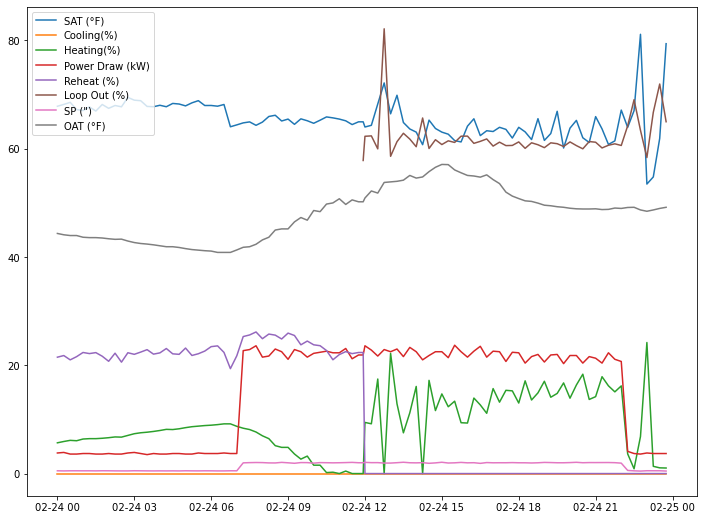

In [2]:
plt.figure(figsize=(12,9))
for i in df.columns:
    if i not in ["DateTime"]:
        plt.plot(df["DateTime"],df[i].ffill(),label=i)
plt.legend(loc=2)

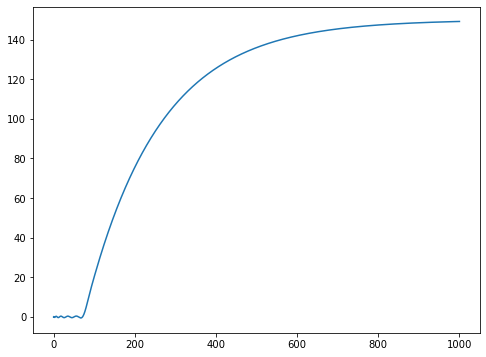

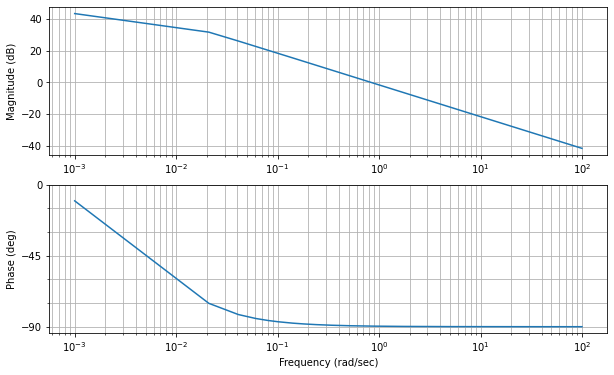

In [4]:
K = 150 #°F
tau = 180 #s
theta = 74 #s

P = K/(tau*s+1)
num_delay, den_delay = pade(theta,n=10)
G_delay = tf(num_delay,den_delay)

t = np.linspace(0,1000,2000)

y, t = step(P*G_delay,t)

plt.figure(figsize=(8,6))
plt.plot(t,y)
#plt.hlines(150*0.63,0,600)

w = np.linspace(1e-3, 1e2, 5000)
plt.figure(figsize=(10,6))
mag,phase,omega = bode(P, w, Hz=False, plot=True)

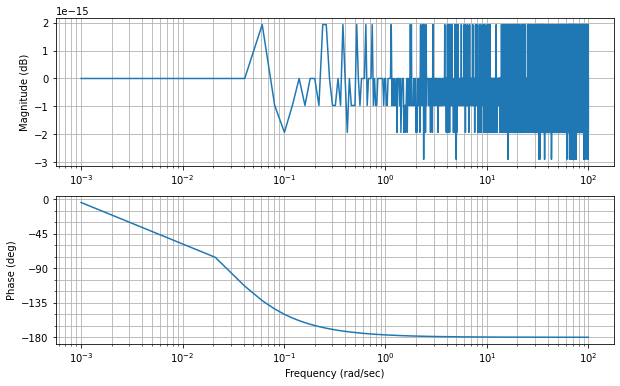

In [9]:
'''
w = np.linspace(1e-3, 1e2, 5000)
plt.figure(figsize=(10,6))
mag,phase,omega = bode(G_delay, w, Hz=False, plot=True)

'''
